# Major Project by SHASHANK MAURYA
gmail: shashankmaurya1020@gmail.com

to: event@verzeo.in

subject: ML-MAJOR-MAR-ML03B3

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("Womens_Clothing_E_Commerce_Reviews.csv")  

In [4]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [5]:
### Displaying the column names in the df
df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [6]:
### Deleting the Unnamed field in the df
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [7]:
### Data Types of each field of df
df.dtypes

Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

In [8]:
df.describe()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936
std,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


In [9]:
### Counting the null values in each field
print('Field Name \t\t Null Values')
print('========== \t\t ===========')
df.isna().sum()

Field Name 		 Null Values
========== 		 ===========


Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [10]:
### Finding the maximum and minimum age of the Shoppers (Women)
df['Age'].agg(['min', 'max'])

min    18
max    99
Name: Age, dtype: int64

### Making column 'Rating Category' which classify good or bad items 

### 

In [11]:
### Categorising Rating as Good or Bad
df['Rating Category'] = 'Good'
df.loc[df.Rating <= 3, ['Rating Category']] = 'Bad'

### Making Age Group Column

In [12]:
# Age Grouping
df["Age Group"] = df['Age'].map(lambda x: "18 - 24" if 18 <= x <= 24 else("25 - 32" if 25 <= x <= 32 else("33 - 40" if 33 <= x <= 40 else("41 - 50" if 41 <= x <= 50 else("51 - 60" if 51 <= x <= 60 else("61 - 70" if 61 <= x <= 70 else"71 - 100" ))))))

### Rating vs count 

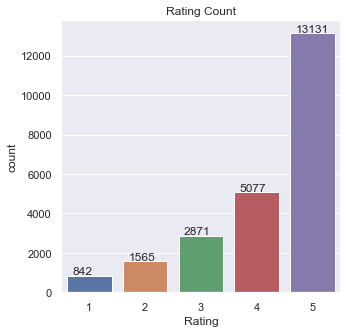

In [13]:
### Plotting Rating Bar Graph
sns.set(rc={'figure.figsize':(5,5)})
ax = sns.countplot(df['Rating'])
ax.set(title='Rating Count')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

* With this graph we understand there are 18000 good clouths and 5000 bad 

### Total good and bad Rating

In [14]:
y = df[df['Rating Category'] == 'Good'].groupby(df['Clothing ID'])['Clothing ID'].agg(['count']).reset_index().sort_values(by = 'count', ascending = False).values.tolist()

x = df[df['Rating Category'] == 'Bad'].groupby(df['Clothing ID'])['Clothing ID'].agg(['count']).reset_index().sort_values(by = 'count', ascending = False).values.tolist()

xy = []
for i in y:
    for j in x:
        if i[0] == j[0]:
            xy += [ i + [j[1]] + [i[1] + j[1]] ]
            break

xf = pd.DataFrame(xy,columns = ['Clothing ID','Good','Bad','Total Review'])
xf.head(15)

,Clothing ID,Good,Bad,Total Review
0,1078,796,228,1024
1,862,627,179,806
2,1094,584,172,756
3,1081,471,111,582
4,872,459,86,545
5,829,406,121,527
6,1110,377,103,480
7,895,323,81,404
8,868,295,135,430
9,936,285,73,358


* Clothing ID 1078, 862, 1094 are most purchased products

### Graph of top 3 selling Cloths 

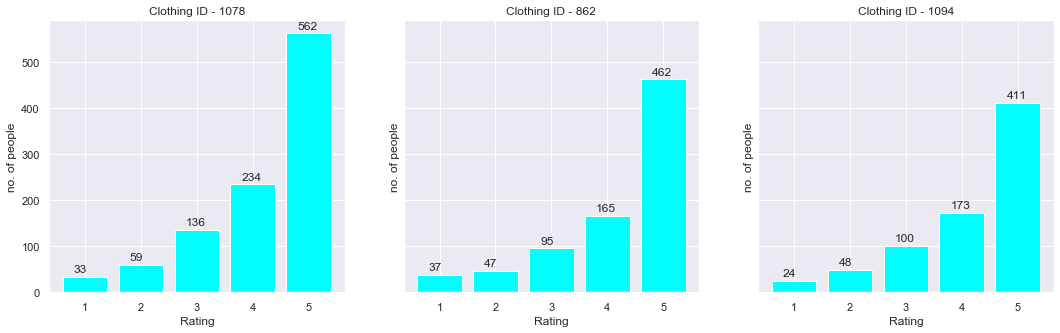

In [15]:
# Clothing ID 1078 according to Rating

x_1 = df[df['Clothing ID'] == 1078].groupby(df['Rating'])['Clothing ID'].count().to_dict()

# Clothing ID 862 according to Rating
x_2 = df[df['Clothing ID'] == 862].groupby(df['Rating'])['Clothing ID'].count().to_dict()

# Clothing ID 1094 according to Rating
x_3 = df[df['Clothing ID'] == 1094].groupby(df['Rating'])['Clothing ID'].count().to_dict()
    
# ploting graphs
fig, (ax,ax1,ax2) = plt.subplots(1,3, figsize=(18,5), sharey=True)
ax.bar(list(x_1.keys()),x_1.values(), color ='cyan')
ax.set_title('Clothing ID - 1078')
ax.set_ylabel('no. of people')
ax.set_xlabel('Rating')
ax.grid(True)

ax1.bar(list(x_2.keys()),x_2.values(), color ='cyan')
ax1.set_title('Clothing ID - 862')
ax1.set_ylabel('no. of people')
ax1.set_xlabel('Rating')
ax1.grid(True)

ax2.bar(list(x_3.keys()),x_3.values(), color ='cyan')
ax2.set_title('Clothing ID - 1094')
ax2.set_ylabel('no. of people')
ax2.set_xlabel('Rating')
ax2.grid(True)

# annotating graph
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+10))
for p in ax1.patches:
        ax1.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+10))
for p in ax2.patches:
        ax2.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+10))

### Age Group Count

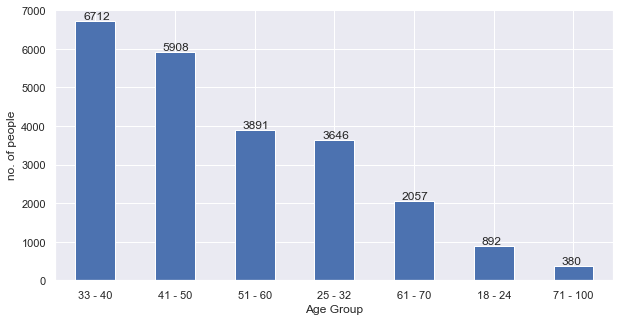

In [16]:
sns.set(rc={'figure.figsize':(10,5)})
x = df['Age Group'].value_counts().plot.bar(rot=0)
x.set_xlabel('Age Group')
x.set_ylabel('no. of people')
# annotating 
for p in x.patches:
        x.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

### Most Review count of all Ages

Text(0.5, 1.0, 'Number of review per page')

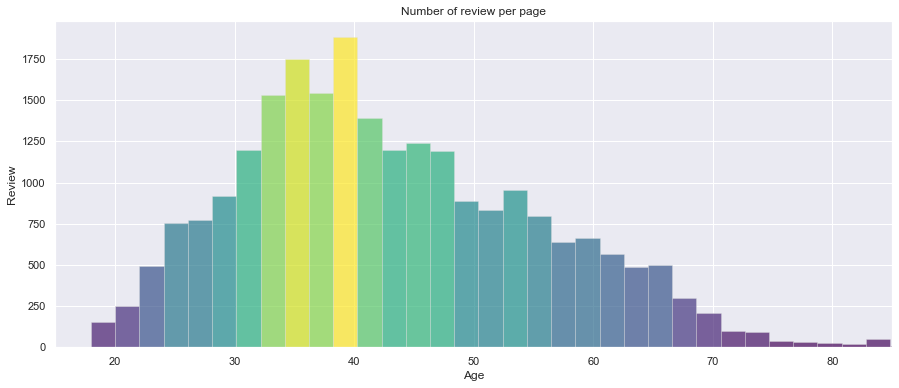

In [17]:
sns.set(rc={'figure.figsize':(15,6)})
n, bins, pat = plt.hist(df['Age'], bins=40, facecolor='#2ab0ff', edgecolor='#e0e0e0', linewidth=0.5, alpha=0.7)
n = n.astype('int')
for i in range(len(pat)):
    pat[i].set_facecolor(plt.cm.viridis(n[i]/max(n)))
plt.xlabel("Age")
plt.ylabel("Review")
plt.xlim([15,85])
plt.title("Number of review per page")

* we can see age Group from $35$ to $40$ has highest no. of review count

In [18]:
Good = df[df['Rating Category']=='Good']
Bad = df[df['Rating Category']=='Bad']

## Good and Bad Review Count By each Age

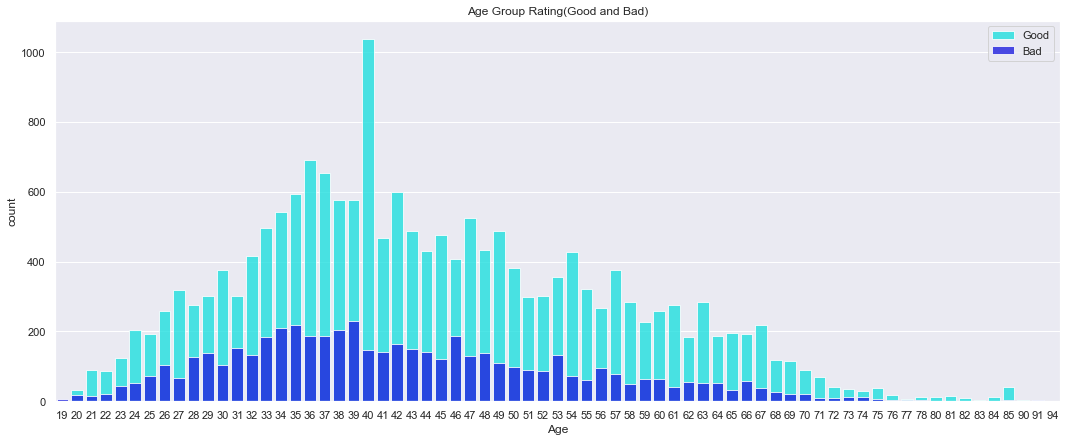

In [19]:
sns.set(rc={'figure.figsize':(18,7)})
ax = sns.countplot(Good['Age'], color="cyan", alpha = 0.8, label = "Good")
ax1 = sns.countplot(Bad['Age'], color="blue", alpha = 0.8, label = "Bad")
plt.title("Age Group Rating(Good and Bad)")
plt.legend()

from this data we know that most of the bad and good rating are from 33 to 39

In [20]:
df.groupby(df['Recommended IND'])['Clothing ID'].count()

Recommended IND
0     4172
1    19314
Name: Clothing ID, dtype: int64

In [21]:
recommended = df[df['Recommended IND']==1]
not_recommended = df[df['Recommended IND']==0]

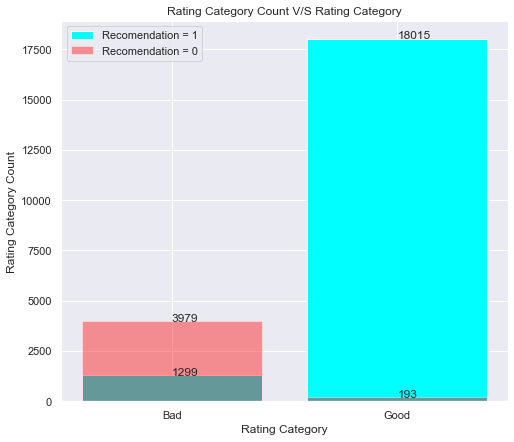

In [22]:
gen = {i: (df[df['Recommended IND'] == i].groupby(df['Rating Category'])['Clothing ID'].count().to_dict()) for i in df['Recommended IND'].unique()}
sns.set(rc={'figure.figsize':(8,7)})

gen1 = gen[1]
gen0 = gen[0]
plt.bar(tuple(gen1.keys()), gen1.values(), color = ['cyan'], label = 'Recomendation = 1')
for i in range(len(gen1.values())):
    plt.annotate(str(tuple(gen1.values())[i]), xy=(tuple(gen1.keys())[i],tuple(gen1.values())[i]))
plt.bar(tuple(gen0.keys()), gen0.values(), color = ['red'], label = 'Recomendation = 0', alpha = 0.4)
for i in range(len(gen0.values())):
    plt.annotate(str(tuple(gen0.values())[i]), xy=(tuple(gen0.keys())[i],tuple(gen0.values())[i]))
plt.title('Rating Category Count V/S Rating Category')
plt.xlabel('Rating Category')
plt.ylabel('Rating Category Count')
plt.legend()

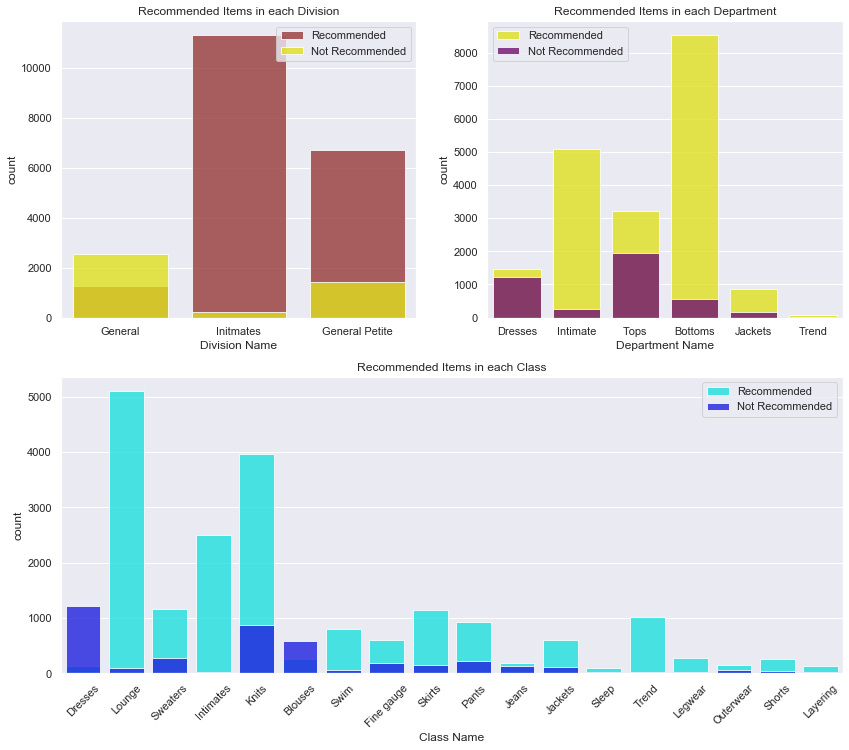

In [23]:
fig = plt.figure(figsize=(14, 12))
ax1 = plt.subplot2grid((2, 2), (0, 0))
ax1 = sns.countplot(recommended['Division Name'], color = "brown", alpha = 0.8, label = "Recommended")
ax1 = sns.countplot(not_recommended['Division Name'], color = "yellow", alpha = 0.8, label = "Not Recommended")
ax1 = plt.title("Recommended Items in each Division")
ax1 = plt.legend()

ax2 = plt.subplot2grid((2, 2), (0, 1))
ax2 = sns.countplot(recommended['Department Name'], color="yellow", alpha = 0.8, label = "Recommended")
ax2 = sns.countplot(not_recommended['Department Name'], color="purple", alpha = 0.8, label = "Not Recommended")
ax2 = plt.title("Recommended Items in each Department")
ax2 = plt.legend()

ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)
ax3 = plt.xticks(rotation=45)
ax3 = sns.countplot(recommended['Class Name'], color="cyan", alpha = 0.8, label = "Recommended")
ax3 = sns.countplot(not_recommended['Class Name'], color="blue", alpha = 0.8, label = "Not Recommended")
ax3 = plt.title("Recommended Items in each Class")
ax3 = plt.legend()

## Boxplot - Rating vs Diffrent 

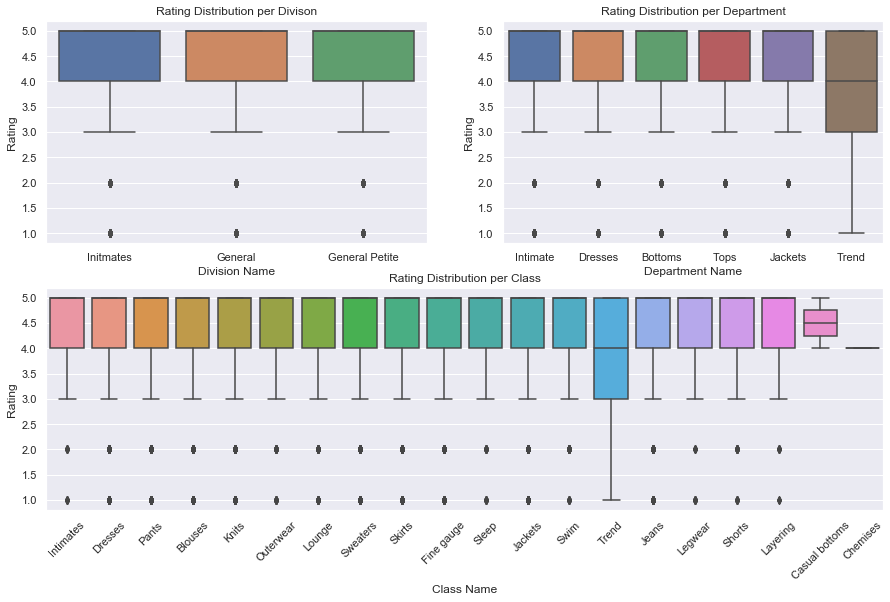

In [24]:
fig = plt.figure(figsize=(15, 9))

ax1 = plt.subplot2grid((2, 2), (0, 0))
ax1 = sns.boxplot(x="Division Name", y="Rating", data=df)
ax1 = plt.title('Rating Distribution per Divison')

ax2 = plt.subplot2grid((2, 2), (0, 1))
ax2 = sns.boxplot(x="Department Name", y="Rating", data=df)
ax2 = plt.title('Rating Distribution per Department')

ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)
ax3 = plt.xticks(rotation=45)
ax3 = sns.boxplot(x="Class Name", y="Rating", data=df)
ax3 = plt.title('Rating Distribution per Class')

## Cleaning in the review column

In [25]:
# Import natual language toolkit
import nltk
nltk.download('stopwords')
# import beautiful soup
from bs4 import BeautifulSoup
#Import string for list of punctuation
import string
#Import the stopword list
from nltk.corpus import stopwords
#Import Tokenizer
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
#Import stemmer
from nltk.stem.porter import PorterStemmer
import re
import string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shash\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
df['clean_review'] = df['Review Text'].dropna()

In [27]:
def removestop(text):
    removed = [c for c in text if c not in stop]
    return removed

def remove_digi(text):
    z = []
    for i in str(text).split():
        x = []
        if i.isalpha() and len(i)>2:
            x.append(i)
        z.append(''.join(x))
    return z

stopword = stopwords.words('english')

df['clean_review'] = df['Review Text'].str.replace(r'[^\w\s]','')
# removing HTML tags
df['clean_review'] = df['clean_review'].str.replace(r'<.*?>','')   
# Removing punctuations and stopwords
df['clean_review'] = df['clean_review'].apply(lambda x: ' '.join([word for word in remove_digi(x) if word not in stopword ]))

## Using TextBlob to describe Review

In [30]:
! pip install textblob --user
from textblob import TextBlob

bloblist_desc = list()

df_review_str=df['clean_review'].astype(str)
for row in df_review_str:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity))
df_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['Review','polarity'])

ModuleNotFoundError: No module named 'textblob'

In [ ]:
def f1(df_polarity_desc):
    if df_polarity_desc['polarity'] > 0:
        val = "Positive Review"
    elif df_polarity_desc['polarity'] == 0:
        val = "Neutral Review"
    else:
        val = "Negative Review"
    return val
def f(df_polarity_desc):
    if df_polarity_desc['polarity'] >= 0:
        val = 1
    else:
        val = 0
    return val

In [ ]:
df_polarity_desc['Sentiment_Type'] = df_polarity_desc.apply(f1, axis=1)
df_polarity_desc['polarity'] = df_polarity_desc.apply(f, axis=1)
df['polarity'] = df_polarity_desc['polarity']

In [ ]:
plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_polarity_desc)
ax = plt.title('Polarity based Review')

## Using WordCloud to Analyze Review  

In [ ]:
from wordcloud import WordCloud
def wc(data,bgcolor,title):
    plt.figure(figsize = (12,12))
    wc = WordCloud(background_color = bgcolor, max_words = 1000,  max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')
Good = df[df['Rating Category']=='Good']
Bad = df[df['Rating Category']=='Bad']

### WordCloud of Good Reviews where Rating is above 3

In [ ]:
wc(Good['clean_review'],'black','Most Used Words')

### WordCloud of Bad Reviews where Rating is 1

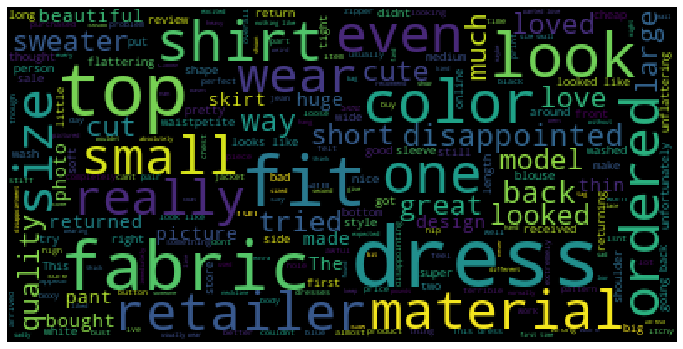

In [36]:
wc(Bad[Bad['Rating']==1]['clean_review'],'black','Most Used Words')

### Lemmatization

In [37]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

# Define a word lemmatizer function
def lemmatize_text(text):
    return ' '.join([lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)])

# Apply the word lemmatizer function to data
df['clean_review'] = df['clean_review'].apply(lemmatize_text)

In [38]:
def oz(text):
    if text=='Good':
        return 1
    else:
        return 0
df['Rating Category1'] = df['Rating Category'].apply(lambda x: oz(x))

# My Modal

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
df.shape

(23486, 15)

### Training Data and Test Data

In [40]:
X = df[['polarity','Rating','Rating Category1']].values
y = df['Recommended IND'].values.reshape(-1,1)

### Train our model

In [41]:
from sklearn.model_selection import cross_val_score, cross_val_predict
def model(mod, model_name, x_train, y_train, x_test, y_test):
    mod.fit(x_train, y_train)
    
    acc = cross_val_score(mod, X_train, y_train, scoring = "accuracy", cv = 5)
    predictions = cross_val_predict(mod, X_train, y_train, cv = 5)
    print(model_name)
    print('-------------------')
    print("Accuracy:", round(acc.mean(),3))
    print('-------------------')
    cm = confusion_matrix(predictions, y_train)
    print("Confusion Matrix:  \n", cm)
    print("                    Classification Report \n",classification_report(predictions, y_train))

    
# Create a train-test split of these variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

### Testing the model 

In [42]:
log = LogisticRegression()
model(log, "Logistic Regression", X_train, y_train, X_test, y_test)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

Logistic Regression
-------------------
Accuracy: 0.937
-------------------
Confusion Matrix:  
 [[ 2770   889]
 [  144 12637]]
                    Classification Report 
               precision    recall  f1-score   support

           0       0.95      0.76      0.84      3659
           1       0.93      0.99      0.96     12781

    accuracy                           0.94     16440
   macro avg       0.94      0.87      0.90     16440
weighted avg       0.94      0.94      0.93     16440



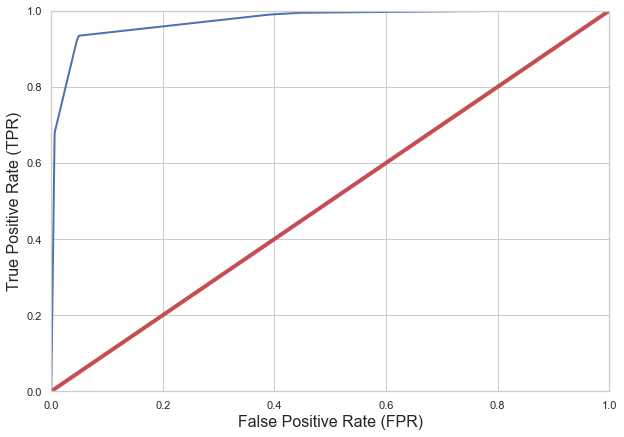

In [49]:
y_scores = log.predict_proba(X_train)
y_scores = y_scores[:,1]

from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_scores)

def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(10, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [51]:
r_a_score = roc_auc_score(y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9733292072990721


Our model achieved 93% efficiency.

# Conclusion

* Started with an unstructured table of 23,000 clothing data
* analysis the dataset of which were affecting user Rating with diffrent Category
* Taken the text reviews, cleaned them and perfoming Lemmatization
* As this is Classification based modal so i am using the Logistic Regression on my modal as we have our all data between 0 and 1 
* Achieved a final accuracy score above 93%

<b>why use Logistic Regression?</b>

* Logistic regression is easier to implement, interpret and very efficient to train.
* Logistic Regression performs well when dataset is Linearly Separable
* the logistic function 1 / (1 + e^-value)
* The output of a logistic regression is more informative than other classification algorithms. Like any regression approach, it expresses the relationship between an outcome variable (label) and each of its predictors (features).